In [4]:
#Importa as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [5]:
#Lista as URLS das fontes dos dados referente a 6 meses de fevereiro a julho
dados_feb = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-02-gasolina-etanol.csv"
dados_mar = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-03-gasolina-etanol.csv"
dados_apr = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-04-gasolina-etanol.csv"
dados_may = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-05-gasolina-etanol-1.csv"
dados_jun = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv"
dados_jul = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv"

csv_file_list = [dados_feb, dados_mar, dados_apr, dados_may, dados_jun, dados_jul]

In [6]:
#Carrega todos os dados em um unico dataframe
list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename, sep=";", decimal=","))

df = pd.concat(list_of_dataframes)

In [7]:
df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,04.594.586/0001-10,RUA ISAURA PARENTE,1412,NaN,ESTACAO EXPERIMENTAL,69918-216,GASOLINA ADITIVADA,02/02/2021,5.29,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,04.594.586/0001-10,RUA ISAURA PARENTE,1412,NaN,ESTACAO EXPERIMENTAL,69918-216,ETANOL,02/02/2021,4.09,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,04.594.586/0001-10,RUA ISAURA PARENTE,1412,NaN,ESTACAO EXPERIMENTAL,69918-216,GASOLINA,02/02/2021,5.29,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,AVENIDA NACOES UNIDAS,23,NaN,AVIARIO,69909-720,GASOLINA ADITIVADA,02/02/2021,5.29,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,AVENIDA NACOES UNIDAS,23,NaN,AVIARIO,69909-720,GASOLINA,02/02/2021,5.22,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [8]:
df.shape

(251420, 16)

In [9]:
#Verificando os tipos de dados de cada Coluna
df.dtypes

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [66]:
#Modificando o tipo da coluna Data da Coleta do tipo object para datetime e ordenando por data.
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'])
df = df.sort_values(by="Data da Coleta")

In [67]:
df.dtypes

Região - Sigla               object
Estado - Sigla               object
Município                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Número Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Valor de Compra             float64
Unidade de Medida            object
Bandeira                     object
dtype: object

In [68]:
df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
4204,CO,MS,CAMPO GRANDE,POSTO FIGUEIRA RUI BARBOSA LTDA,10.713.751/0001-09,RUA TRINDADE,843,NaN,VILA IEDA,79050-480,ETANOL,2021-01-02,3.388,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2166,SE,SP,SAO JOSE DO RIO PRETO,AUTO POSTO ZANI COMERCIO DE DERIVADOS DE PETRO...,05.508.853/0001-52,AVENIDA AUGUSTO BUFFULIN,87,NaN,JD. NUNES,15046-800,ETANOL,2021-01-02,2.999,NaN,R$ / litro,IPIRANGA
2167,SE,SP,SAO JOSE DO RIO PRETO,AUTO POSTO ZANI COMERCIO DE DERIVADOS DE PETRO...,05.508.853/0001-52,AVENIDA AUGUSTO BUFFULIN,87,NaN,JD. NUNES,15046-800,GASOLINA ADITIVADA,2021-01-02,4.659,NaN,R$ / litro,IPIRANGA
2168,SE,SP,SAO JOSE DO RIO PRETO,AUTO POSTO RIO PIEDADE LTDA,01.992.476/0001-19,AVENIDA ERNANI P DOMINGUES,4200,NaN,PQ RES LAUREANO TEBA,15042-102,GASOLINA,2021-01-02,4.499,NaN,R$ / litro,BRANCA
2169,SE,SP,SAO JOSE DO RIO PRETO,AUTO POSTO RIO PIEDADE LTDA,01.992.476/0001-19,AVENIDA ERNANI P DOMINGUES,4200,NaN,PQ RES LAUREANO TEBA,15042-102,ETANOL,2021-01-02,2.949,NaN,R$ / litro,BRANCA


In [13]:
#Verificando valores nulos
df.isnull().sum()

Região - Sigla            0
Estado - Sigla            0
Município                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Número Rua              116
Complemento          200239
Bairro                  536
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      251420
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [14]:
df['Região - Sigla'].unique()

array(['N', 'NE', 'CO', 'SE', 'S'], dtype=object)

In [15]:
#Quantidades de dados de cada região
df['Região - Sigla'].value_counts()

SE    129097
NE     47803
S      40250
CO     20897
N      13373
Name: Região - Sigla, dtype: int64

In [16]:
#Porcentagem de dados por Região
df['Região - Sigla'].value_counts(normalize = True)

SE    0.513471
NE    0.190132
S     0.160091
CO    0.083116
N     0.053190
Name: Região - Sigla, dtype: float64

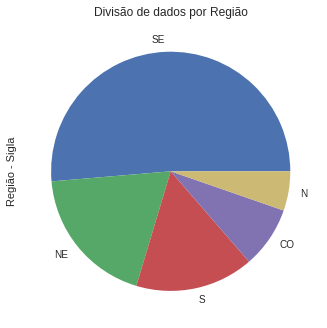

In [17]:
#Visualização da distribuição dos dados nas regiões
df['Região - Sigla'].value_counts().plot.pie(title="Divisão de dados por Região")

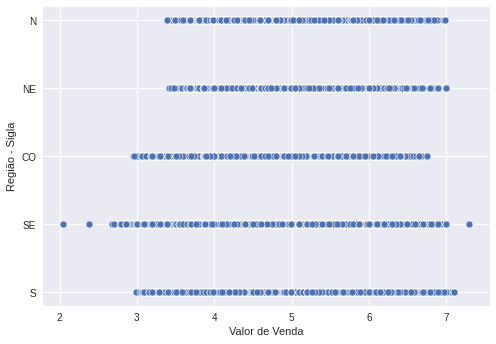

In [18]:
#Visualização da distribuição de preços por região
sns.scatterplot(y="Região - Sigla", x="Valor de Venda", data=df)

In [19]:
#Resumo descritivo do Valor de venda do combustivel
df['Valor de Venda'].describe()

count    251420.000000
mean          5.156551
std           0.782930
min           2.050000
25%           4.590000
50%           5.320000
75%           5.749000
max           7.299000
Name: Valor de Venda, dtype: float64

In [20]:
#Valor Medio do Preço de venda
df["Valor de Venda"].mean()

5.156550668205508

In [23]:
#Valor medio do Preço de venda por região entre Fevereiro e Julho 2021
df.groupby(df['Região - Sigla'])["Valor de Venda"].mean()

Região - Sigla
CO    5.116651
N     5.443058
NE    5.325381
S     5.279848
SE    5.032372
Name: Valor de Venda, dtype: float64

In [69]:
#Valor medio do preço do combustivel na data coletada
df.groupby(df['Data da Coleta'])["Valor de Venda"].mean()

Data da Coleta
2021-01-02    4.354438
2021-01-03    4.773953
2021-01-04    4.967102
2021-01-06    5.295779
2021-01-07    5.381983
                ...   
2021-11-07    5.528788
2021-12-03    5.007783
2021-12-04    5.005710
2021-12-05    5.230277
2021-12-07    5.392207
Name: Valor de Venda, Length: 150, dtype: float64

In [58]:
#Gerando um DF intermediario da Media por dia dos preços
dfPrecoMedia = df.groupby(df['Data da Coleta'])["Valor de Venda"].mean()

In [38]:
#Atribuindo os valores medios por dia em um dataframe intermediario
dfPrecoData = df.groupby(df['Data da Coleta'])["Valor de Venda"].mean()

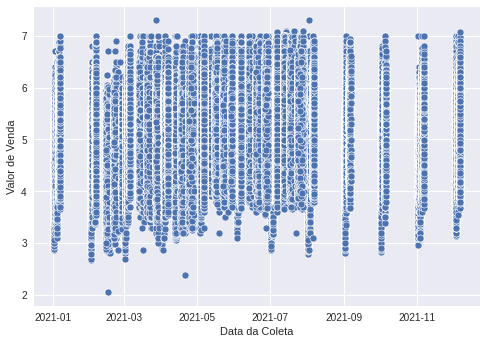

In [25]:
#Visualização da Distribuição dos preços por data
sns.scatterplot(x="Data da Coleta", y="Valor de Venda", data=df)

In [32]:
#Observações de algumas datas
df['Data da Coleta'].tail(100)

47749   2021-07-29
47750   2021-07-25
47751   2021-07-25
47752   2021-07-25
47753   2021-07-26
           ...    
47844   2021-07-26
47845   2021-07-26
47846   2021-07-26
47847   2021-07-28
47848   2021-07-28
Name: Data da Coleta, Length: 100, dtype: datetime64[ns]

In [26]:
#Tabela cruzada entre a Data da Coleta com a Media de preços por cada Região do Pais
pd.crosstab(df['Data da Coleta'], df['Região - Sigla'], values=df['Valor de Venda'], aggfunc='mean')

Região - Sigla,CO,N,NE,S,SE
Data da Coleta,,,,,
2021-01-02,4.335862,4.792231,4.560673,4.521941,4.189233
2021-01-03,4.667321,5.177354,4.823061,4.934669,4.695062
2021-01-04,4.913052,4.854444,5.197123,5.163328,4.799051
2021-01-06,5.345677,5.744080,5.535109,5.340675,5.171384
2021-01-07,5.308043,5.789848,5.536513,5.557401,5.214323
...,...,...,...,...,...
2021-11-07,5.551984,5.745670,5.621357,5.292642,5.393144
2021-12-03,5.527833,NaN,NaN,5.335556,4.947080
2021-12-04,4.804399,5.256788,5.069541,5.131592,4.942727


In [70]:
dfPrecoMedia.tail(10)

Data da Coleta
2021-11-02    4.531666
2021-11-03    5.185257
2021-11-04    5.061617
2021-11-05    5.144158
2021-11-06    5.204976
2021-11-07    5.528788
2021-12-03    5.007783
2021-12-04    5.005710
2021-12-05    5.230277
2021-12-07    5.392207
Name: Valor de Venda, dtype: float64

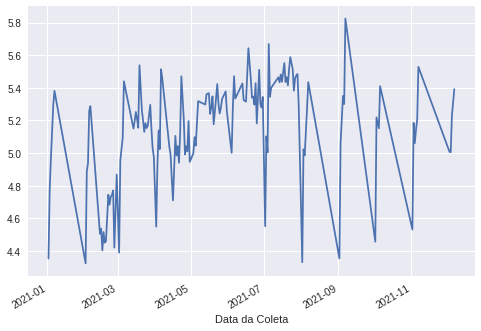

In [71]:
#Por motivos da maneira que foi escrita a formato da data, ele esta apresentando incompatibilidade.
dfPrecoMedia.plot()